In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
drug_reviews_drugs_com = fetch_ucirepo(id=462)

# data (as pandas dataframes)
X = drug_reviews_drugs_com.data.features

# metadata
print(drug_reviews_drugs_com.metadata)

# variable information
print(drug_reviews_drugs_com.variables)


{'uci_id': 462, 'name': 'Drug Reviews (Drugs.com)', 'repository_url': 'https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com', 'data_url': 'https://archive.ics.uci.edu/static/public/462/data.csv', 'abstract': 'The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Text'], 'num_instances': 215063, 'num_features': 6, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C5SK5S', 'creators': ['Surya Kallumadi', 'Felix Grer'], 'intro_paper': {'title': 'Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning', 'authors': 'F. Grä

In [ ]:
X

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...
215058,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
215059,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
215060,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
215061,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [ ]:
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
X.condition.value_counts()

condition
Birth Control                                   38436
Depression                                      12164
Pain                                             8245
Anxiety                                          7812
Acne                                             7435
                                                ...  
ungal Pneumonia                                     1
145</span> users found this comment helpful.        1
47</span> users found this comment helpful.         1
76</span> users found this comment helpful.         1
Ramsay Hunt Syndrome                                1
Name: count, Length: 916, dtype: int64

In [ ]:
X1=X[(X['condition']=='Birth Control')|(X['condition']=='Depression')|(X['condition']=='Pain')|(X['condition']=='Anxiety')]

In [ ]:
X.shape

(215063, 6)

In [ ]:
X1.shape

(66657, 6)

In [ ]:
X2=X1.drop(['drugName','rating','date','usefulCount'],axis=1)

In [ ]:
X2

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
14,Birth Control,"""Started Nexplanon 2 months ago because I have..."
...,...,...
215056,Birth Control,"""I was on Microgestin for about 3 years. Over ..."
215057,Birth Control,"""I started taking Apri about 7 months ago. My ..."
215059,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra..."
215060,Birth Control,"""I&#039;m married, 34 years old and I have no ..."


**EDA**

In [ ]:
X2.condition.value_counts()

condition
Birth Control    38436
Depression       12164
Pain              8245
Anxiety           7812
Name: count, dtype: int64

In [ ]:
X2.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
14,Birth Control,"""Started Nexplanon 2 months ago because I have..."


In [ ]:
X2_birth=X2[X2['condition']=='Birth Control']
X2_dep=X2[X2['condition']=='Depression']
X2_pain=X2[X2['condition']=='Pain']
X2_anxiety=X2[X2['condition']=='Anxiety']

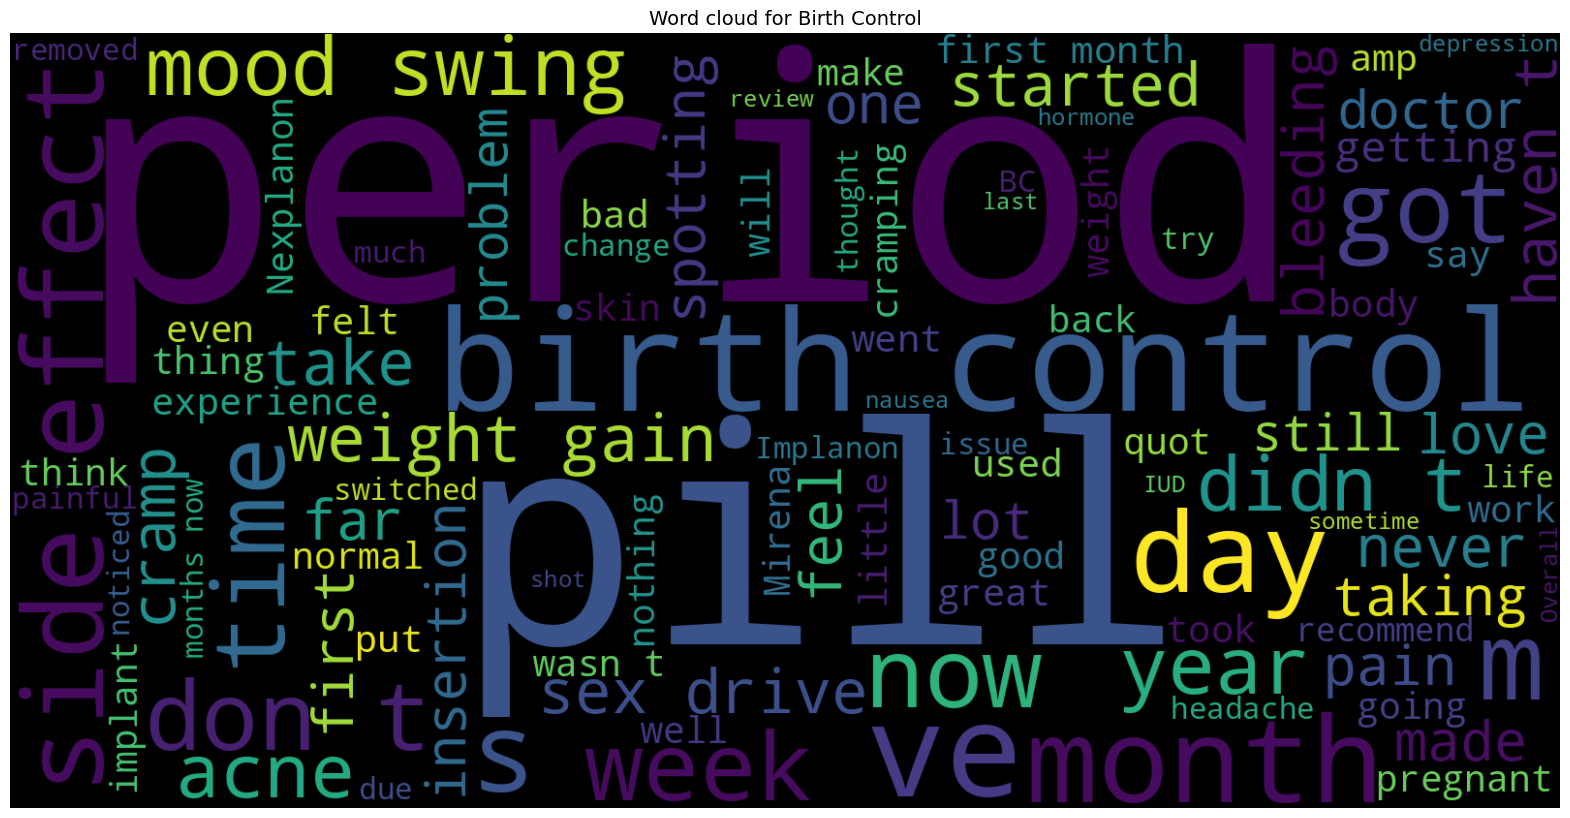

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=100, width=1600, height=800).generate("".join(X2_birth.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word cloud for Birth Control",fontsize=14)
plt.axis("off")
plt.show()

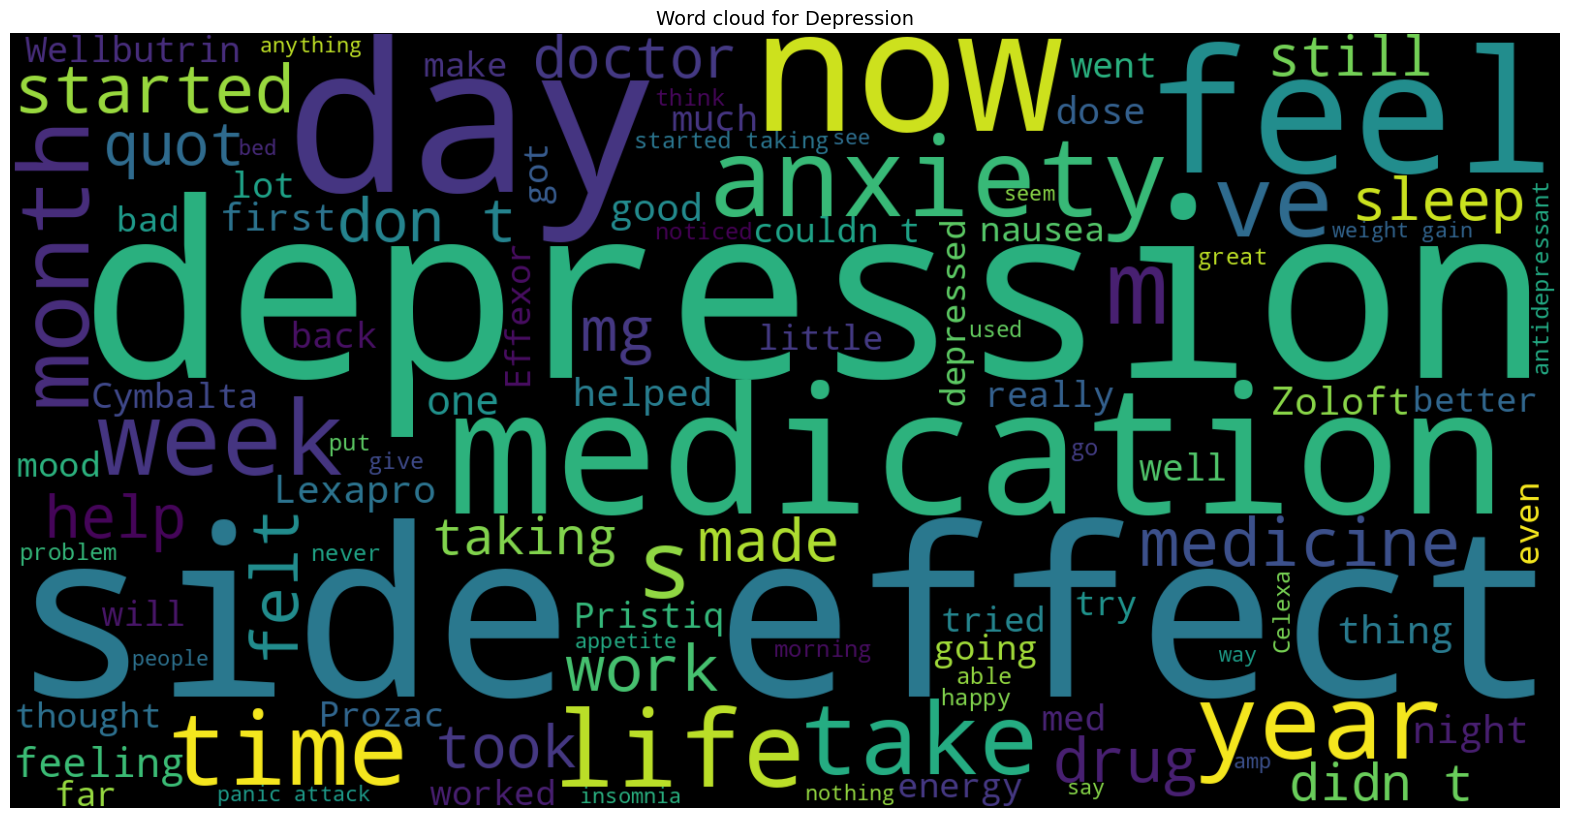

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=100, width=1600, height=800).generate("".join(X2_dep.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word cloud for Depression",fontsize=14)
plt.axis("off")
plt.show()

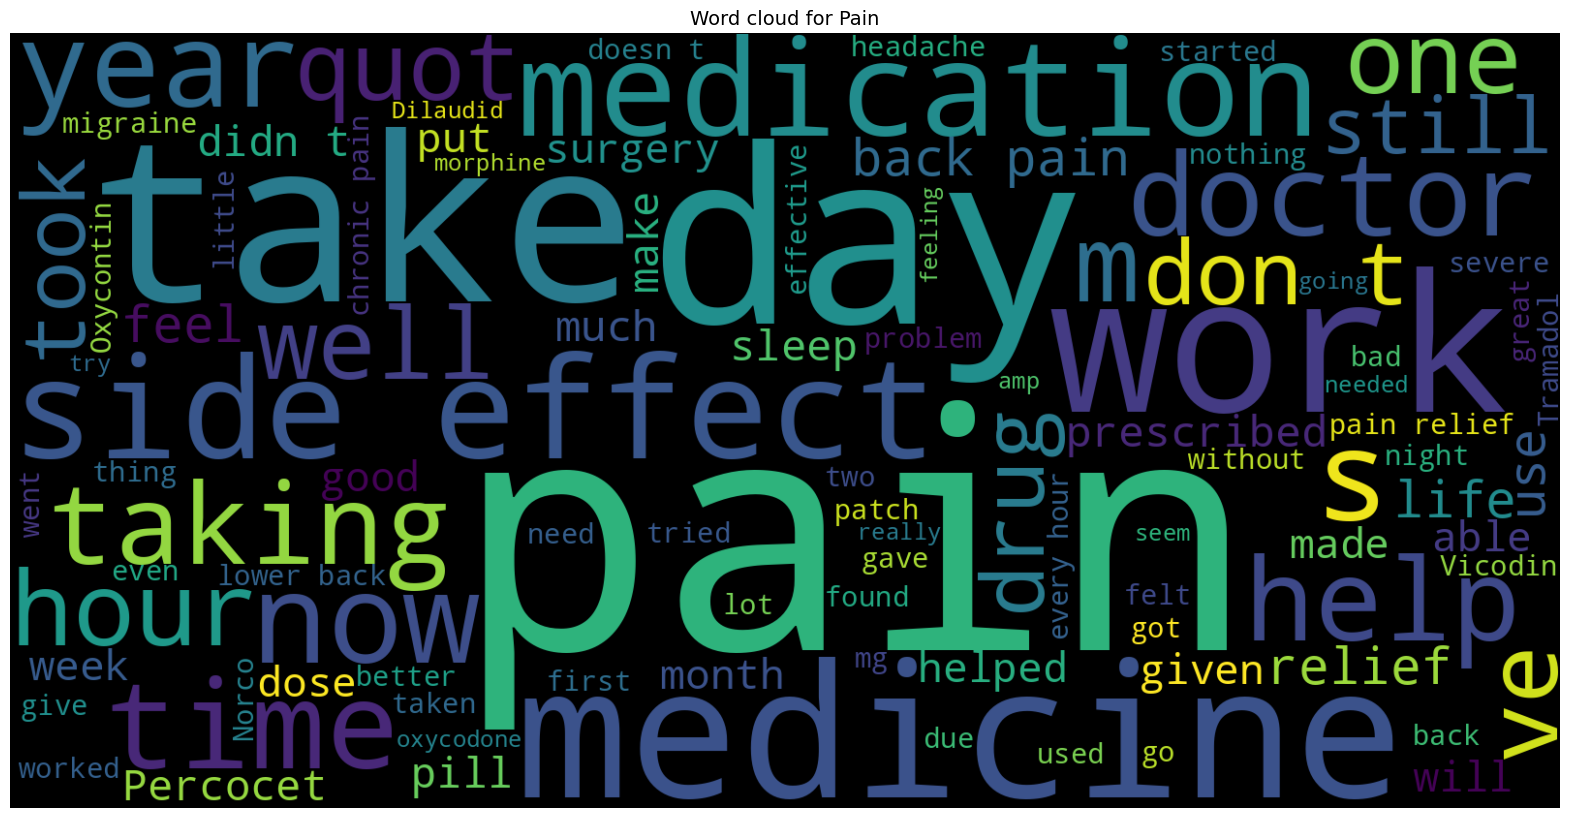

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=100, width=1600, height=800).generate("".join(X2_pain.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word cloud for Pain",fontsize=14)
plt.axis("off")
plt.show()

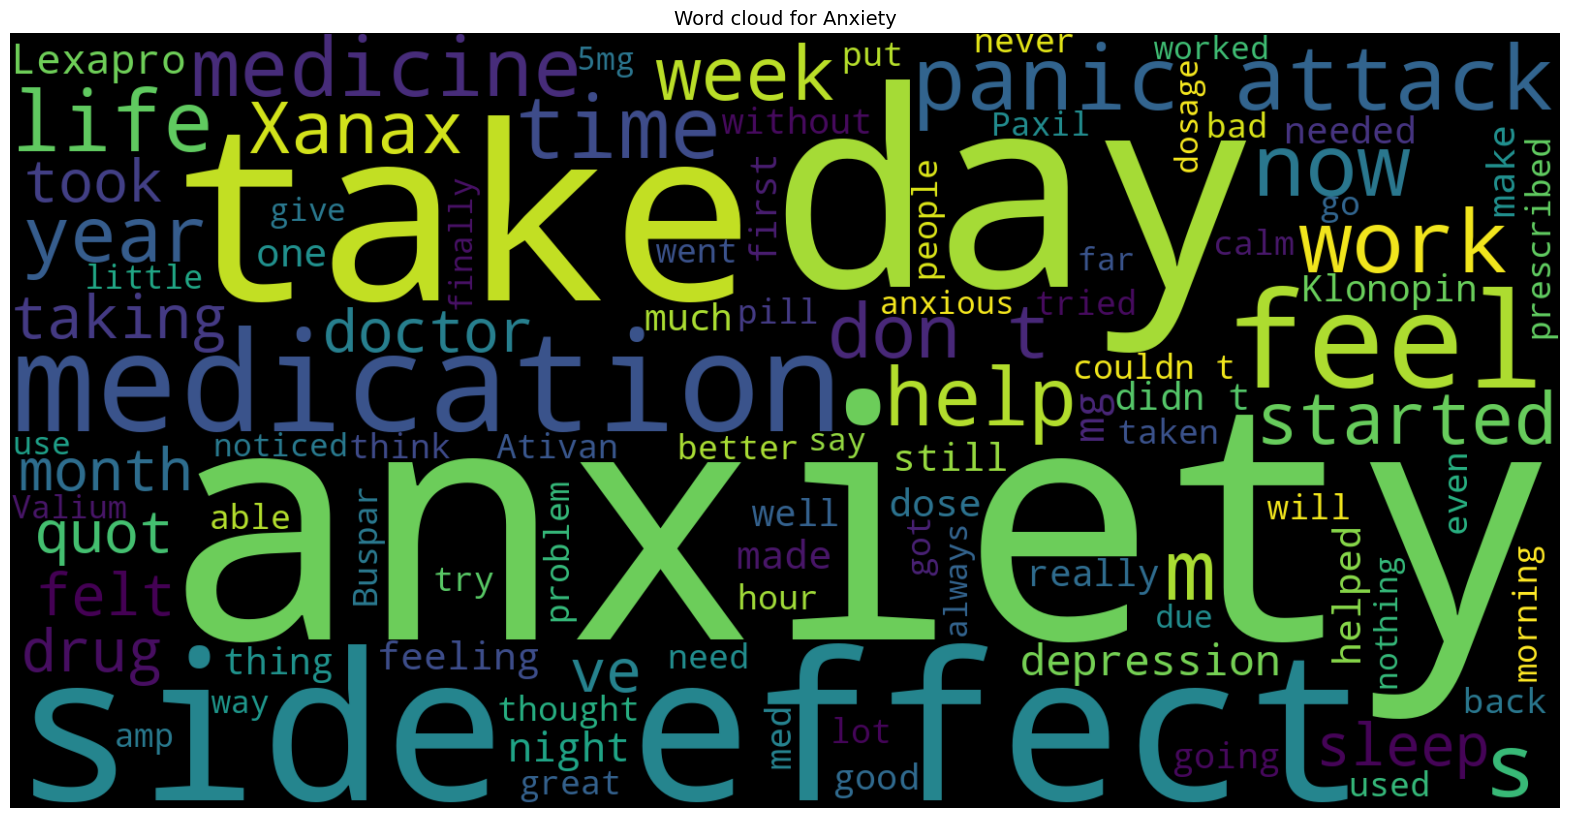

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=100, width=1600, height=800).generate("".join(X2_anxiety.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word cloud for Anxiety",fontsize=14)
plt.axis("off")
plt.show()

**Data Cleaning**

In [ ]:
for i,col in enumerate(X2.columns):
  X2.iloc[:,i]=X2.iloc[:,i].astype(str).str.replace('"','')

**Removal of Stopwords**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

In [ ]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

**Lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
porter=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [ ]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [ ]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


**HTML Parsing**

In [ ]:
from bs4 import BeautifulSoup
import re

In [ ]:
def html_parsing(raw_review):
  review_text=BeautifulSoup(raw_review,'html.parser').get_text()
  return review_text

In [ ]:
X2['review_clean']=X2['review'].apply(html_parsing)

<ipython-input-29-cc7b33fadc51>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text=BeautifulSoup(raw_review,'html.parser').get_text()


In [ ]:
X2

,condition,review,review_clean
2,Birth Control,"I used to take another oral contraceptive, whi...","I used to take another oral contraceptive, whi..."
3,Birth Control,This is my first time using any form of birth ...,This is my first time using any form of birth ...
9,Birth Control,I had been on the pill for many years. When my...,I had been on the pill for many years. When my...
11,Depression,"I have taken anti-depressants for years, with ...","I have taken anti-depressants for years, with ..."
14,Birth Control,Started Nexplanon 2 months ago because I have ...,Started Nexplanon 2 months ago because I have ...
...,...,...,...
215056,Birth Control,I was on Microgestin for about 3 years. Over t...,I was on Microgestin for about 3 years. Over t...
215057,Birth Control,I started taking Apri about 7 months ago. My b...,I started taking Apri about 7 months ago. My b...
215059,Anxiety,I&#039;ve been taking Lexapro (escitaploprgram...,I've been taking Lexapro (escitaploprgram) sin...
215060,Birth Control,"I&#039;m married, 34 years old and I have no k...","I'm married, 34 years old and I have no kids. ..."


**Stopwords removal**

In [ ]:
def stopwords_removal(raw_review):
   lines = raw_review.lower().splitlines()
   processed_lines = []
   for line in lines:
        words = line.split()
        meaningful_words = [w for w in words if w not in stop]
        processed_lines.append(" ".join(meaningful_words))

   return "\n".join(processed_lines)

In [ ]:
X2['review_clean']=X2['review_clean'].apply(stopwords_removal)

In [ ]:
X3=X2.drop("review",axis=1)

In [ ]:
X3

,condition,review_clean
2,Birth Control,"used take another oral contraceptive, 21 pill ..."
3,Birth Control,first time using form birth control. i'm glad ...
9,Birth Control,"pill many years. doctor changed rx chateal, ef..."
11,Depression,"taken anti-depressants years, improvement most..."
14,Birth Control,started nexplanon 2 months ago minimal amount ...
...,...,...
215056,Birth Control,"microgestin 3 years. past year, started get ex..."
215057,Birth Control,started taking apri 7 months ago. breats got n...
215059,Anxiety,i've taking lexapro (escitaploprgram) since fe...
215060,Birth Control,"i'm married, 34 years old kids. taking pill ha..."


In [ ]:
X3['condition'].value_counts()

condition
Birth Control    38436
Depression       12164
Pain              8245
Anxiety           7812
Name: count, dtype: int64

**Balancing the data**

In [ ]:
from sklearn.utils import resample

In [ ]:
X3_majority = X3[X3['condition'] == 'Birth Control']
X3_depression = X3[X3['condition'] == 'Depression']
X3_pain = X3[X3['condition'] == 'Pain']
X3_anxiety = X3[X3['condition'] == 'Anxiety']

In [ ]:
X3_majority_downsampled = resample(X3_majority,
                                   replace=False,
                                   n_samples=8245,
                                   random_state=42)

In [ ]:
X3_depression_upsampled = resample(X3_depression,
                                   replace=True,
                                   n_samples=8245,
                                   random_state=42)

In [ ]:
X3_anxiety_upsampled = resample(X3_anxiety,
                                replace=True,
                                n_samples=8245,
                                random_state=42)

In [ ]:
X3_balanced = pd.concat([X3_majority_downsampled, X3_depression_upsampled, X3_pain, X3_anxiety_upsampled])

In [ ]:
print(X3_balanced['condition'].value_counts())

condition
Birth Control    8245
Depression       8245
Pain             8245
Anxiety          8245
Name: count, dtype: int64


In [ ]:
X3_balanced

,condition,review_clean
100020,Birth Control,please read!!!!!!!!!!!!!!\nhi all! i'm 18 year...
91128,Birth Control,switched ocella taking yaz 3months. pcos well....
77333,Birth Control,"honestly, one worst birth control pills i've e..."
52361,Birth Control,"went get iud, decided look online read women e..."
12023,Birth Control,hi everyone. going start saying every birth co...
...,...,...
175648,Anxiety,"suffer sever depression, severe anxiety, sever..."
7392,Anxiety,started taking medication last night already f...
67578,Anxiety,"diagnosed gad, panic disorder ptsd. hard time ..."
12389,Anxiety,"can't sleep, talking fast heart feels like goi..."


**Creating features and Target Variables**

In [ ]:
X_feat=X3_balanced["review_clean"]
y=X3_balanced["condition"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_feat,y,stratify=y,test_size=0.2,random_state=0)

In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  plt.imshow(cm, cmap, interpolation='nearest')
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matric")
  else:
    print("Confusion matrix,without normalization")

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment="center",color="white"if cm[i,j]>thresh else "black")

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

**Bag of words**

In [ ]:
count_vectorizer=CountVectorizer(stop_words="english")
count_train=count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

**Naive Bayes Classifier**

In [ ]:
mnb=MultinomialNB()
mnb.fit(count_train,y_train)
pred=mnb.predict(count_test)
score=metrics.accuracy_score(y_test,pred)

Confusion matrix,without normalization


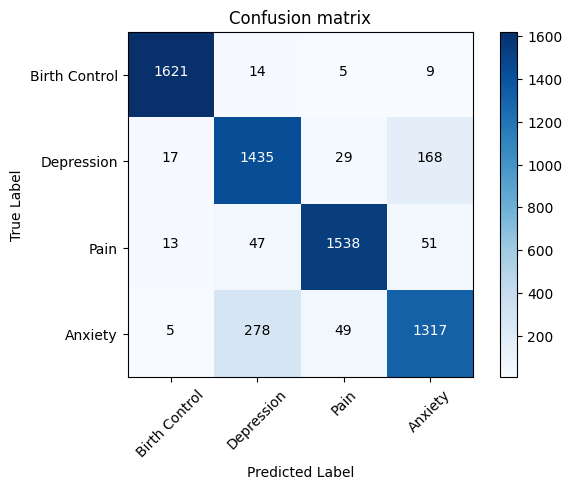

In [ ]:
cm=metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','Pain','Anxiety'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','Pain','Anxiety'])

In [ ]:
print("Accuracy:", score)

Accuracy: 0.8961491813220134


**Passive Aggressive Classifier**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

In [ ]:
passive=PassiveAggressiveClassifier()

In [ ]:
passive.fit(count_train,y_train)
pred_pac=passive.predict(count_test)
score_pac=metrics.accuracy_score(y_test,pred)

Confusion matrix,without normalization


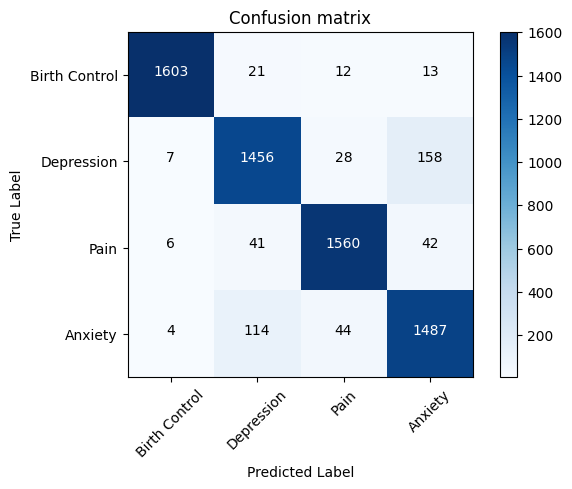

In [ ]:
cm=metrics.confusion_matrix(y_test,pred_pac,labels=['Birth Control','Depression','Pain','Anxiety'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','Pain','Anxiety'])

In [ ]:
print("Accuracy:", score_pac)

Accuracy: 0.8961491813220134


**TFIDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.8)
tfidf_train_2=tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2=tfidf_vectorizer.transform(X_test)

**Naive Bayes Classifier**

In [ ]:
mnb=MultinomialNB()
mnb.fit(tfidf_train_2,y_train)
pred=mnb.predict(tfidf_test_2)
score_tfidf=metrics.accuracy_score(y_test,pred)

Confusion matrix,without normalization


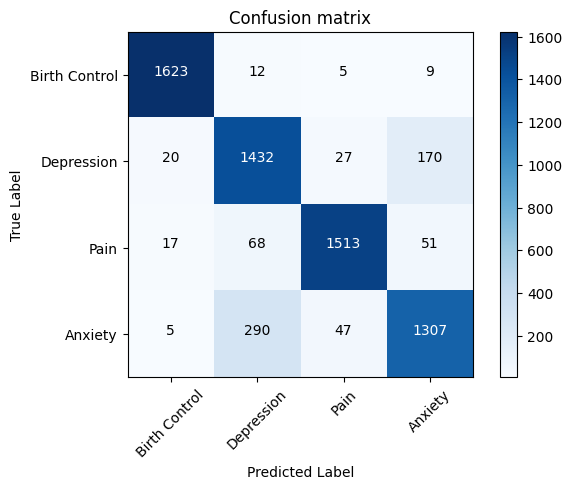

In [ ]:
cm=metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','Pain','Anxiety'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','Pain','Anxiety'])

In [ ]:
print("Accuracy:", score_tfidf)

Accuracy: 0.8906913280776229


**Passive Aggressive Classifier**

In [ ]:
passive.fit(tfidf_train_2,y_train)
pred_pac_2=passive.predict(tfidf_test_2)
score_pac_2=metrics.accuracy_score(y_test,pred_pac_2)

Confusion matrix,without normalization


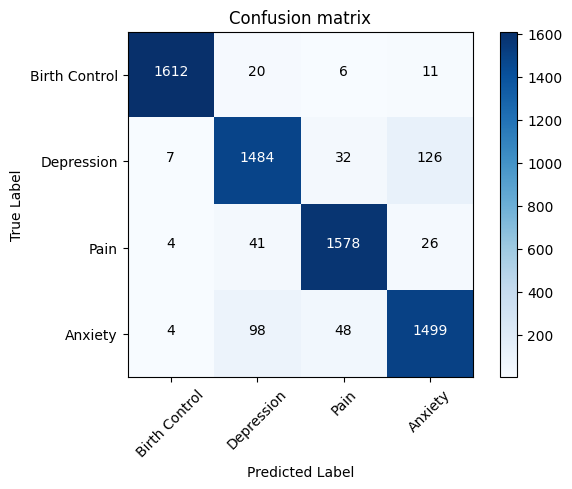

In [ ]:
cm=metrics.confusion_matrix(y_test,pred_pac_2,labels=['Birth Control','Depression','Pain','Anxiety'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','Pain','Anxiety'])

In [ ]:
print("Accuracy:", score_pac_2)

Accuracy: 0.9358702243784112


**Deployment using Gradio**

In [ ]:
!pip install gradio

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.6 MB/s eta 0:00:00
   ━━━━

In [ ]:
import gradio as gr

In [ ]:
def condition(review):
  return passive.predict(review)

In [ ]:
interface=gr.Interface(fn=condition, inputs='text', outputs='text')

In [ ]:
interface=gr.Interface(fn=condition,
                       inputs=gr.Textbox(lines=5,placeholder="Enter the review here....."),
                       examples=[["Geodon is a very effective drug for me.Completely wiped out the auditory hallucinations."]],
                       outputs="text")

In [ ]:
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d3af3ad618e43386fe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
